In [1]:
# ref: http://blog.keyrus.co.uk/a_simple_approach_to_predicting_customer_churn.html

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from IPython.display import display, HTML

%matplotlib inline

In [3]:
df = pd.read_csv('data/churn.csv')
df.head()

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Churn,Int'l Plan,VMail Plan,...,Day Charge,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,State,Area Code,Phone
0,128,25,265.1,197.4,244.7,10.0,1,0,0,1,...,45.07,99,16.78,91,11.01,3,2.70,KS,415,382-4657
1,107,26,161.6,195.5,254.4,13.7,1,0,0,1,...,27.47,103,16.62,103,11.45,3,3.70,OH,415,371-7191
2,137,0,243.4,121.2,162.6,12.2,0,0,0,0,...,41.38,110,10.30,104,7.32,5,3.29,NJ,415,358-1921
3,84,0,299.4,61.9,196.9,6.6,2,0,1,0,...,50.90,88,5.26,89,8.86,7,1.78,OH,408,375-9999
4,75,0,166.7,148.3,186.9,10.1,3,0,1,0,...,28.34,122,12.61,121,8.41,3,2.73,OK,415,330-6626


In [6]:
df.describe()

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Churn,Int'l Plan,VMail Plan,Day Calls,Day Charge,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,Area Code
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,8.099010,179.775098,200.980348,200.872037,10.237294,1.562856,0.144914,0.096910,0.276628,100.435644,30.562307,100.114311,17.083540,100.107711,9.039325,4.479448,2.764581,437.182418
std,39.822106,13.688365,54.467389,50.713844,50.573847,2.791840,1.315491,0.352067,0.295879,0.447398,20.069084,9.259435,19.922625,4.310668,19.568609,2.275873,2.461214,0.753773,42.371290
min,1.000000,0.000000,0.000000,0.000000,23.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000,1.040000,0.000000,0.000000,408.000000
25%,74.000000,0.000000,143.700000,166.600000,167.000000,8.500000,1.000000,0.000000,0.000000,0.000000,87.000000,24.430000,87.000000,14.160000,87.000000,7.520000,3.000000,2.300000,408.000000
50%,101.000000,0.000000,179.400000,201.400000,201.200000,10.300000,1.000000,0.000000,0.000000,0.000000,101.000000,30.500000,100.000000,17.120000,100.000000,9.050000,4.000000,2.780000,415.000000
75%,127.000000,20.000000,216.400000,235.300000,235.300000,12.100000,2.000000,0.000000,0.000000,1.000000,114.000000,36.790000,114.000000,20.000000,113.000000,10.590000,6.000000,3.270000,510.000000
max,243.000000,51.000000,350.800000,363.700000,395.000000,20.000000,9.000000,1.000000,1.000000,1.000000,165.000000,59.640000,170.000000,30.910000,175.000000,17.770000,20.000000,5.400000,510.000000


In [10]:
df.shape

(3333, 21)

In [11]:
# data prep
# outliers
# fillin missing values
# Parsing dates and numbers in incorrect formats
# Extracting features out of text


In [12]:
# Drop the columns that we have decided won't be used in prediction
df = df.drop(["Phone", "Area Code", "State"], axis=1)
features = df.drop(["Churn"], axis=1).columns

In [14]:
df.head()

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Churn,Int'l Plan,VMail Plan,Day Calls,Day Charge,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge
0,128,25,265.1,197.4,244.7,10.0,1,0,0,1,110,45.07,99,16.78,91,11.01,3,2.70
1,107,26,161.6,195.5,254.4,13.7,1,0,0,1,123,27.47,103,16.62,103,11.45,3,3.70
2,137,0,243.4,121.2,162.6,12.2,0,0,0,0,114,41.38,110,10.30,104,7.32,5,3.29
3,84,0,299.4,61.9,196.9,6.6,2,0,1,0,71,50.90,88,5.26,89,8.86,7,1.78
4,75,0,166.7,148.3,186.9,10.1,3,0,1,0,113,28.34,122,12.61,121,8.41,3,2.73


In [16]:
scaler = StandardScaler()

In [17]:
X = df.drop(['Churn'], axis=1)
y = df['Churn']

In [19]:
x_scaler = scaler.fit_transform(X)
x_scaler

array([[ 0.67648946,  1.23488274,  1.56676695, ...,  0.86602851,
        -0.60119509, -0.0856905 ],
       [ 0.14906505,  1.30794844, -0.33373776, ...,  1.05938994,
        -0.60119509,  1.2411686 ],
       [ 0.9025285 , -0.59175986,  1.16830364, ..., -0.75557074,
         0.21153386,  0.69715637],
       ...,
       [-1.83505538, -0.59175986,  0.01881963, ..., -0.17548645,
         0.61789834,  1.3871231 ],
       [ 2.08295458, -0.59175986,  0.62477766, ..., -1.22139599,
         2.24335625, -1.87695028],
       [-0.67974475,  1.23488274,  1.00304237, ...,  0.80010984,
        -0.19483061,  1.2411686 ]])

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [25]:
# Set up our RandomForestClassifier instance and fit to data
clf = RandomForestClassifier(n_estimators=30)
clf.fit(X_train, Y_train)

# Make predictions
predictions = clf.predict(X_test[features])
probs = clf.predict_proba(X_test[features])
display(predictions)

array([0, 0, 1, ..., 0, 1, 0])

In [27]:
score = clf.score(X_test, Y_test)
print("Accuracy: ", score)

Accuracy:  0.9454545454545454


In [30]:
get_ipython().magic('matplotlib inline')
confusion_matrix = pd.DataFrame(
    confusion_matrix(Y_test, predictions), 
    columns=["Predicted False", "Predicted True"], 
    index=["Actual False", "Actual True"]
)
display(confusion_matrix)

# Calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = roc_curve(Y_test, probs[:,1])
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

TypeError: 'DataFrame' object is not callable

,importance,labels
2,0.160932,Day Mins
6,0.123779,CustServ Calls
10,0.114555,Day Charge
7,0.075084,Int'l Plan
12,0.073364,Eve Charge


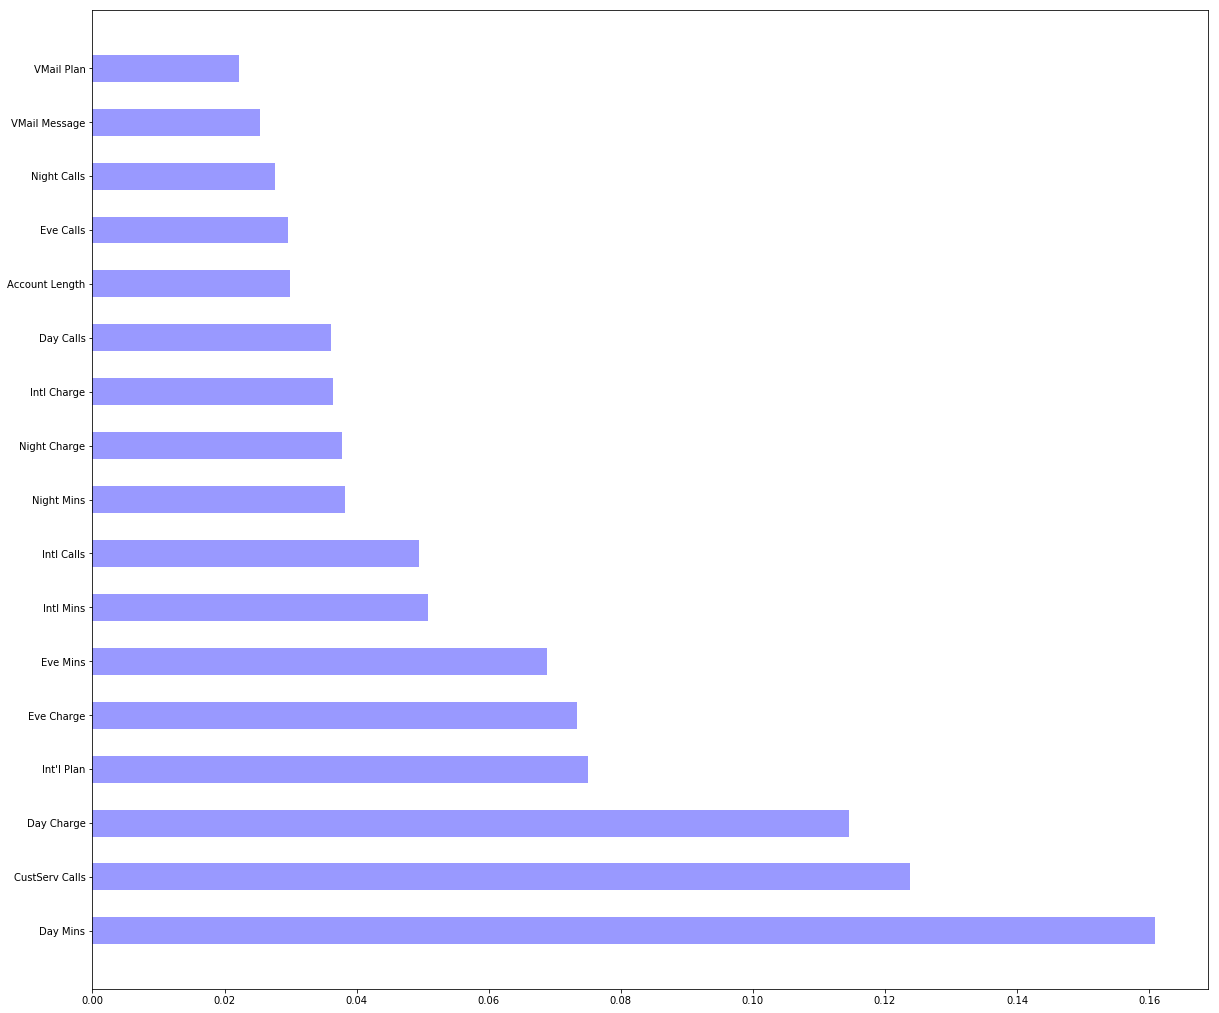

In [32]:
import numpy as np
fig = plt.figure(figsize=(20, 18))
ax = fig.add_subplot(111)

df_f = pd.DataFrame(clf.feature_importances_, columns=["importance"])
df_f["labels"] = features
df_f.sort_values("importance", inplace=True, ascending=False)
display(df_f.head(5))

index = np.arange(len(clf.feature_importances_))
bar_width = 0.5
rects = plt.barh(index , df_f["importance"], bar_width, alpha=0.4, color='b', label='Main')
plt.yticks(index, df_f["labels"])
plt.show()

In [37]:
X_test["prob_true"] = probs[:, 1]
df_risky = X_test[X_test["prob_true"] > 0.9]
display(df_risky.head(5)[["prob_true"]])


/Users/sulbha/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,prob_true
3169,0.966667
1078,0.933333
289,0.966667
76,0.966667
332,0.933333
